# We explore the creation of synthetic apogee spectra

In [6]:
import apogee.modelspec.turbospec
from apogee.modelatm import atlas9
from apogee.modelspec import ferre
from apogee.tools import paramIndx
import matplotlib.pyplot as plt
import numpy as np


def get_parameters(metals,am,cm):
    atm= atlas9.Atlas9Atmosphere(teff=4750.,logg=2.5,metals=metals,am=am,cm=cm)
    ferre_synspec= apogee.modelspec.turbospec.synth([6,0],modelatm=atm,linelist='201404080919',lsf='all',cont='aspcap',vmacro=6.,isotopes='solar')
    errs = np.ones(np.shape(ferre_synspec[0]))*0.01
    ferre_fit = ferre.fit(ferre_synspec[0],errs,lib='GK',pca=True,sixd=True)
    abunds = ferre.elemfitall(ferre_synspec[0],errs,lib='GK',pca=True,sixd=True)
    return ferre_fit,abunds



In [7]:
fparams_list = []
abundances_list = []
cm_range = np.linspace(-1,1,3)
for cm in cm_range:
    fparams,abundances = get_parameters(metals=0,am=0,cm=cm)
    fparams_list.append(fparams)
    abundances_list.append(abundances)

fparams_array = np.concatenate(fparams_list)

2920 2920                                                                       
2920 2920                                                                       
2920 2920                                                                       


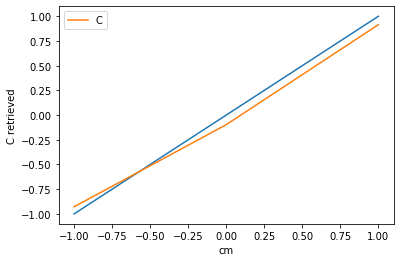

In [8]:
plt.plot([-1,1],[-1,1])
plt.plot(cm_range,fparams_array[:,paramIndx("C")],label="C")
plt.xlabel("cm")
plt.ylabel("C retrieved")
plt.legend()
plt.show()

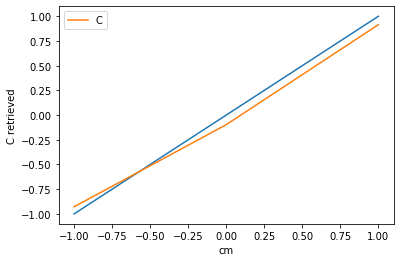

In [3]:
plt.plot([-1,1],[-1,1])
plt.plot(cm_range,fparams_array[:,paramIndx("C")],label="C")
plt.xlabel("cm")
plt.ylabel("C retrieved")
plt.legend()
plt.show()

In [10]:
fparams_list = []
abundances_list = []
mm_range = np.linspace(-1,1,3)
for mm in mm_range:
    fparams,abundances = get_parameters(metals=mm,am=0,cm=0)
    fparams_list.append(fparams)
    abundances_list.append(abundances)

fparams_array = np.concatenate(fparams_list)

2920 2920                                                                       
2920 2920                                                                       
2920 2920                                                                       


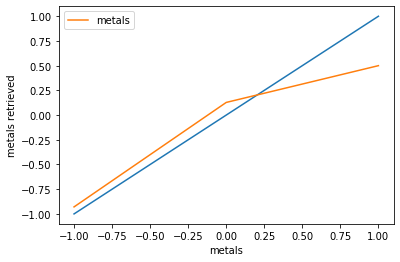

In [11]:
plt.plot([-1,1],[-1,1])
plt.plot(mm_range,fparams_array[:,paramIndx("metals")],label="metals")
plt.xlabel("metals")
plt.ylabel("metals retrieved")
plt.legend()
plt.show()

In [ ]:
v=test([[0,5],[0,6]])

In [ ]:
v+([0,6],)

In [ ]:
t = (1,2,3)
t = t + (1,)
print(t)

In [ ]:
args

In [ ]:
fparams_list = []
abundances_list = []
cm_range = np.linspace(-1,1,3)
for cm in cm_range:
    fparams,abundances = get_parameters(metals=0,am=0,cm=cm)
    fparams_list.append(fparams)
    abundances_list.append(abundances)

fparams_array = np.concatenate(fparams_list)

In [ ]:
plt.plot([-1,1],[-1,1])
plt.plot(cm_range,fparams_array[:,paramIndx("C")],label="C")
plt.xlabel("cm")
plt.ylabel("C retrieved")
plt.legend()
plt.show()

In [ ]:
fparams_list = []
abundances_list = []
am_range = np.linspace(-1,1,3)
for am in am_range:
    fparams,abundances = get_parameters(metals=0,am=am,cm=0)
    fparams_list.append(fparams)
    abundances_list.append(abundances)

fparams_array = np.concatenate(fparams_list)

In [ ]:
plt.plot([-1,1],[-1,1])
plt.plot(am_range,fparams_array[:,paramIndx("alpha")],label="alpha")
plt.xlabel("am")
plt.ylabel("alpha retrieved")
plt.legend()
plt.show()

## We load the modules and define some interfaces

In [ ]:
import apogee.modelspec.turbospec
from apogee.modelatm import atlas9
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys
import copy
import apogee.spec.plot as splot
import apogee.tools.read as apread
from apogee.modelspec import ferre
from apogee.tools import paramIndx


a_elems = [8,10,12,14,16,18,20,22]
elements= [[7,0.28,0.11],[8,0.03,0.08],[11,-0.05,0.38],[12,0.06,0.08],[13,0.07,0.09],[14,0.05,0.07],[16,0.05,0.1],[19,0.04,0.07],[20,0.02,0.04],[22,-0.01,0.06],[23,-0.01,0.11],[25,-0.04,0.07],[28,0.02,0.04],[15,-0.04,0.18],[24,-0.01,0.06],[27,0,0.15],[37,-0.03,0.29]]


def process_am(abundances):
    """modifies the alpha element abundances so that they are expressed in terms of am, acordingly also estimates and returns the value of am"""
    am = 0
    for i in abundances:
        if i[0] in a_elems:
            am+=i[1]
    am = am/len(a_elems) #get average am value
    for i in abundances:
        if i[0] in a_elems:
           i[1]-=am  #substract am value log(X/alpha)=log((X*Fe)/(alpha*Fe))=log(X/Fe)-log(alpha/Fe)
    return abundances,am


def generate_spectra(t_eff,log_g,metals,abundance_lists,am=0.25,cm=0.):
    atm= atlas9.Atlas9Atmosphere(teff=t_eff,logg=log_g,metals=metals,am=am,cm=cm)
    # The following takes a while ...
    synspec= apogee.modelspec.turbospec.synth(*abundance_lists,modelatm=atm,linelist='201404080919',lsf='all',cont='true',vmacro=6.,isotopes='solar')
    return synspec



In [ ]:
def generate_spectra(t_eff,log_g,metals,abundance_lists,am=0.25,cm=0.):
    atm= atlas9.Atlas9Atmosphere(teff=t_eff,logg=log_g,metals=metals,am=am,cm=cm)
    # The following takes a while ...
    synspec= apogee.modelspec.turbospec.synth(*abundance_lists,modelatm=atm,linelist='201404080919',lsf='all',cont='true',vmacro=6.,isotopes='solar')
    return synspec



## We generate some synthetic stars

varying metallicity

In [ ]:
atm= atlas9.Atlas9Atmosphere(teff=4750.,logg=2.5,metals=-0.25,am=0.25,cm=0.25)
# The following takes a while ...
synspec= apogee.modelspec.turbospec.synth([22,-0.3],modelatm=atm,linelist='201404080919',lsf='all',cont='aspcap',vmacro=6.,isotopes='solar')


We plot the difference between two stars identical in all respects but Fe/H.

In [ ]:
plt.plot(synspec[0]-synspec[1])
plt.ylim(-0.05,0.2)

In [ ]:
atm= atlas9.Atlas9Atmosphere(teff=4750.,logg=2.5,metals=-0.25,am=0.25,cm=0.75)
atm2= atlas9.Atlas9Atmosphere(teff=4750.,logg=2.5,metals=-0.25,am=0.25,cm=-0.75)

synspec= apogee.modelspec.turbospec.synth(modelatm=atm,linelist='201404080919',lsf='all',cont='aspcap',vmacro=6.,isotopes='solar')
synspec2= apogee.modelspec.turbospec.synth(modelatm=atm2,linelist='201404080919',lsf='all',cont='aspcap',vmacro=6.,isotopes='solar')



In [ ]:
plt.plot(synspec[0]-synspec2[0])
#plt.xlim(5200,5300)

In [ ]:
#plt.plot(synspec[0]-synspec2[0])
plt.plot(synspec[0])
plt.plot(synspec2[0])
plt.xlim(5200,5300)

### Visualizing the spectral signature of lines

In [ ]:
atm= atlas9.Atlas9Atmosphere(teff=4750.,logg=2.5,metals=-0.25,am=0.25,cm=0.25)

spectra_array=[]
for elem in elements:
    elem_id = [elem[0]]
    elem_vals = [elem[1]-2*elem[2],elem[1]+2*elem[2]]
    
    abu = elem_id+elem_vals
    synspec= apogee.modelspec.turbospec.synth(abu,[22,-0.3],modelatm=atm,linelist='201404080919',lsf='all',cont='aspcap',vmacro=6.,isotopes='solar')
    print(elem_id+elem_vals)
    plt.plot(synspec[0]-synspec[1])
    plt.title(elem_id)
    plt.ylim(-0.05,0.15)    
    plt.show()
    spectra_array.append([elem_id,synspec])

In [ ]:
atm2 = atlas9.Atlas9Atmosphere(teff=4750.,logg=2.5,metals=0.25,am=0.25,cm=0.5)
spectra2_array=[]

for elem in elements:
    elem_id = [elem[0]]
    elem_vals = [elem[1]-2*elem[2],elem[1]+2*elem[2]]
    
    abu = elem_id+elem_vals
    synspec= apogee.modelspec.turbospec.synth(abu,[22,-0.3],modelatm=atm2,linelist='201404080919',lsf='all',cont='aspcap',vmacro=6.,isotopes='solar')
    print(elem_id+elem_vals)
    plt.plot(synspec[0]-synspec[1])
    plt.title(elem_id)
    plt.ylim(-0.05,0.15)    
    plt.show()
    spectra2_array.append([elem_id,synspec])

In [ ]:
spectra_array[-1][-1]

In [ ]:
plt.plot(spectra_array[-1][-1][0])
plt.plot(spectra2_array[-1][-1][1])
plt.xlim(900,1100)


In [ ]:
plt.plot(spectra_array[-1][-1][0]-spectra_array[-1][-1][1])
plt.xlim(900,1100)
plt.ylim(-0.05,0.15)    


In [ ]:
plt.plot(synspec[1]-synspec[0])
plt.xlim(7300,8000)
#plt.plot(synspec[1])

In [ ]:
splot.windows(spectra_array[4][-1][0],'Al')
splot.windows(spectra_array[4][-1][1],'Al',overplot=True,)

In [ ]:
elements[6]

In [ ]:
splot.windows(spectra_array[6][-1][0],'S')
splot.windows(spectra2_array[6][-1][0],'S',overplot=True,)

In [ ]:
splot.windows(spectra_array[6][-1][0],'S')
splot.windows(spectra_array[6][-1][1],'S',overplot=True,)

### Playing with Ferre

In [ ]:
atm= atlas9.Atlas9Atmosphere(teff=4250.,logg=2.2,metals=-0.2,am=0.3,cm=0.25)
ferre_synspec= apogee.modelspec.turbospec.synth(modelatm=atm,linelist='201404080919',lsf='all',cont='aspcap',vmacro=6.,isotopes='solar')
errs = np.ones(np.shape(ferre_synspec[0]))*0.001
ferre_fit = ferre.fit(ferre_synspec[0],errs,lib='GK',pca=True,sixd=True)
print("teff:"+str(ferre_fit[0][paramIndx("teff")]))
print("logg:"+str(ferre_fit[0][paramIndx("logg")]))
print("metals:"+str(ferre_fit[0][paramIndx("metals")]))
print("alpha:"+str(ferre_fit[0][paramIndx("alpha")]))
print("C:"+str(ferre_fit[0][paramIndx("C")]))

In [ ]:
atm= atlas9.Atlas9Atmosphere(teff=4250.,logg=2.2,metals=-0.2,am=0.3,cm=0.25)
ferre_synspec= apogee.modelspec.turbospec.synth([6,0.3],modelatm=atm,linelist='201404080919',lsf='all',cont='aspcap',vmacro=6.,isotopes='solar')
errs = np.ones(np.shape(ferre_synspec[0]))*0.001
ferre_fit = ferre.fit(ferre_synspec[0],errs,lib='GK',pca=True,sixd=True)
print("teff:"+str(ferre_fit[0][paramIndx("teff")]))
print("logg:"+str(ferre_fit[0][paramIndx("logg")]))
print("metals:"+str(ferre_fit[0][paramIndx("metals")]))
print("alpha:"+str(ferre_fit[0][paramIndx("alpha")]))
print("C:"+str(ferre_fit[0][paramIndx("C")]))

In [ ]:
atm= atlas9.Atlas9Atmosphere(teff=4250.,logg=2.2,metals=-0.2,am=0.1,cm=0.25)
ferre_synspec= apogee.modelspec.turbospec.synth(modelatm=atm,linelist='201404080919',lsf='all',cont='aspcap',vmacro=6.,isotopes='arcturus')
errs = np.ones(np.shape(ferre_synspec[0]))*0.001
ferre_fit = ferre.fit(ferre_synspec[0],errs,lib='GK',pca=True,sixd=True)
print("teff:"+str(ferre_fit[0][paramIndx("teff")]))
print("logg:"+str(ferre_fit[0][paramIndx("logg")]))
print("metals:"+str(ferre_fit[0][paramIndx("metals")]))
print("alpha:"+str(ferre_fit[0][paramIndx("alpha")]))
print("C:"+str(ferre_fit[0][paramIndx("C")]))

In [ ]:
atm= atlas9.Atlas9Atmosphere(teff=4750.,logg=2.5,metals=-0.10,am=0.3,cm=0.25)
ferre_synspec= apogee.modelspec.turbospec.synth(modelatm=atm,linelist='201404080919',lsf='all',cont='aspcap',vmacro=6.,isotopes='solar')
ferre_fit = ferre.fit(ferre_synspec[0],errs,lib='GK',pca=True,sixd=True)
print("teff:"+str(ferre_fit[0][paramIndx("teff")]))
print("logg:"+str(ferre_fit[0][paramIndx("logg")]))
print("metals:"+str(ferre_fit[0][paramIndx("metals")]))
print("alpha:"+str(ferre_fit[0][paramIndx("alpha")]))
print("C:"+str(ferre_fit[0][paramIndx("C")]))

In [ ]:
atm= atlas9.Atlas9Atmosphere(teff=4750.,logg=2.5,metals=-0.10,am=0.1,cm=0.)
ferre_synspec= apogee.modelspec.turbospec.synth(modelatm=atm,linelist='201404080919',lsf='all',cont='aspcap',vmacro=6.,isotopes='solar')
ferre_fit = ferre.fit(ferre_synspec[0],errs,lib='GK',pca=True,sixd=True)
print("teff:"+str(ferre_fit[0][paramIndx("teff")]))
print("logg:"+str(ferre_fit[0][paramIndx("logg")]))
print("metals:"+str(ferre_fit[0][paramIndx("metals")]))
print("alpha:"+str(ferre_fit[0][paramIndx("alpha")]))
print("C:"+str(ferre_fit[0][paramIndx("C")]))

In [ ]:
from apogee.util import solarabundances
help(solarabundances)

In [ ]:
def get_parameters(metals,am,cm):
    atm= atlas9.Atlas9Atmosphere(teff=4750.,logg=2.5,metals=metals,am=am,cm=cm)
    ferre_synspec= apogee.modelspec.turbospec.synth(modelatm=atm,linelist='201404080919',lsf='all',cont='aspcap',vmacro=6.,isotopes='solar')
    errs = np.ones(np.shape(ferre_synspec[0]))*0.01
    ferre_fit = ferre.fit(ferre_synspec[0],errs,lib='GK',pca=True,sixd=True)
    abunds = ferre.elemfitall(ferre_synspec[0],errs,lib='GK',pca=True,sixd=True)
    return ferre_fit,abunds

In [ ]:
def get_abund(abundances_list,elem_name="C"):
    elem_list = []
    for fit in abundances_list:
        elem_list.append(fit[elem_name])
    return elem_list

def get_fparam(fparams_list,param_name="C"):
    param_list = []
    for fit in fparams_list:
        param_list.append(fit[0][paramIndx(param_name)])
    return param_list


In [ ]:
fparams_list = []
abundances_list = []
for metals in np.linspace(-1,1,11):
    fparams,abundances = get_parameters(metals=metals,am=0.,cm=0)
    fparams_list.append(fparams)
    abundances_list.append(abundances)

    #print(metals)

In [ ]:
abundances_list[8]

In [ ]:
for elem in abundances_list[0].keys():
    plt.plot([-1,1],[-1,1])
    plt.plot(np.linspace(-1,1,11),get_abund(abundances_list,elem),label=elem)
    plt.xlabel("metals")
    plt.ylabel("abund")
    plt.legend()
    plt.show()

In [ ]:
fparams_list = []
abundances_list = []
for am in np.linspace(-1,1,6):
    fparams,abundances = get_parameters(metals=0,am=am,cm=0)
    fparams_list.append(fparams)
    abundances_list.append(abundances)


In [ ]:
for elem in abundances_list[0].keys():
    plt.plot([-1,1],[-1,1])
    plt.plot(np.linspace(-1,1,6),get_abund(abundances_list,elem),label=elem)
    plt.xlabel("am")
    plt.ylabel("abund")
    plt.legend()
    plt.show()

In [ ]:
plt.plot([-1,1],[-1,1])
plt.plot(np.linspace(-1,1,6),get_fparam(fparams_list,"alpha"),label="am")
plt.xlabel("am")
plt.ylabel("abund")
plt.legend()
plt.show()

In [ ]:
fparams_list = []
abundances_list = []
for cm in np.linspace(-1,1,6):
    fparams,abundances = get_parameters(metals=0,am=0,cm=cm)
    fparams_list.append(fparams)
    abundances_list.append(abundances)

In [ ]:
plt.plot([-1,1],[-1,1])
plt.plot(np.linspace(-1,1,6),get_fparam(fparams_list,"C"),label="cm")
plt.xlabel("cm")
plt.ylabel("abund")
plt.legend()
plt.show()

In [ ]:
for elem in abundances_list[0].keys():
    plt.plot([-1,1],[-1,1])
    plt.plot(np.linspace(-1,1,6),get_abund(abundances_list,elem),label=elem)
    plt.xlabel("cm")
    plt.legend()
    plt.show()

solarabundances._ASPLUND05

In [ ]:
abunds = ferre.elemfitall(ferre_synspec[0],errs,lib='GK',pca=True,sixd=True)

In [ ]:
print(abunds)

In [ ]:
ferre_fit[0,4]=0.5

In [ ]:
plt.plot(ferre_synspec2[0]-ferre_synspec[0])

In [ ]:
print("C:"+str(ferre_fit[0][paramIndx("C")]))

In [ ]:
help(paramIndx)

In [ ]:
aspec= apread.apStar(4159,'2M07000348+0319407',ext=1,header=False)[1]
aspecerr= apread.apStar(4159,'2M07000348+0319407',ext=2,header=False)[1]

In [ ]:
aspec.shape

### Looking at genuine APOGEE stars

In [ ]:
data= apread.rcsample()
indx= data['SNR'] > 200.
data= data[indx]
splot.waveregions(data[3512]['LOCATION_ID'],data[3512]['APOGEE_ID'],ext=1,
                  labelID=data[3512]['APOGEE_ID'],
                  labelTeff=data[3512]['TEFF'],
                  labellogg=data[3512]['LOGG'],
                  labelmetals=data[3512]['METALS'],
                  labelafe=data[3512]['ALPHAFE'])

In [ ]:
from apogee.tools import download
download.ferreModelLibrary(lib='GK',pca=True,sixd=True,unf=False,dr=None,convertToBin=True)

In [ ]:
import apogee.tools.path as appath
print(appath.ferreModelLibraryPath())

In [ ]:
from apogee.modelspec import ferre
params= ferre.fit(data[3512]['LOCATION_ID'],data[3512]['APOGEE_ID'],pca=True,sixd=True)

In [ ]:
splot.windows(data[3512]['LOCATION_ID'],data[3512]['APOGEE_ID'],'Al')
splot.windows(spectra_array[4][-1][1],'Al',overplot=True,)

In [ ]:
#splot.windows(spectra_array[4][-1][0],'Al')
splot.windows(data[3512]['LOCATION_ID'],"S")

In [ ]:
t_eff= np.random.uniform(4000,5000)
t_effB= np.random.uniform(4000,5000)
log_g= np.random.uniform(1.5,3.0)
log_gB= np.random.uniform(1.5,3.0)
metals = np.random.normal(loc=-0.13,scale=0.24) 
cm = np.random.normal(loc=-0.07,scale=0.1) 

In [ ]:
abundances = []
for l in elements:
    #l.append(np.random.uniform(-0.5,0.5)) #the quantity of abundance shift
    ab = np.random.normal(loc=l[1],scale=l[2])
    abundances.append([l[0],ab])

In [ ]:
abundances, am = process_am(copy.deepcopy(abundances))  


In [ ]:
atm= atlas9.Atlas9Atmosphere(teff=t_eff,logg=log_g,metals=metals,am=am,cm=cm)
synspec= apogee.modelspec.turbospec.synth(*abundance_lists,modelatm=atm,linelist='201404080919',lsf='all',cont='true',vmacro=6.,isotopes='solar')

In [ ]:
atm.plot('P')

In [ ]:
! ls $SDSS_LOCAL_SAS_MIRROR/apogeework/apogee/spectro/redux/speclib/kurucz_filled/mm03cm03om03

In [ ]:
! head -n 100 ~/.bashrc

In [ ]:
import apogee.modelspec.turbospec
from apogee.modelatm import atlas9
atm= atlas9.Atlas9Atmosphere(teff=4750.,logg=2.5,metals=-0.25,am=0.25,cm=0.25)
# The following takes a while ...
synspec= apogee.modelspec.turbospec.synth([26,-0.25,0.25],[22,-0.3],modelatm=atm,\
         linelist='201404080919',lsf='all',cont='aspcap',vmacro=6.,isotopes='solar')


In [ ]:
import apogee.spec.plot as splot
splot.waveregions(synspec[0])
splot.waveregions(synspec[1],overplot=True)

In [ ]:
atm_ng= atlas9.Atlas9Atmosphere(teff=4850.,logg=2.65,metals=-0.3,am=0.15,cm=0.05)
abu= [13,-1.,-0.75,-0.5,-0.25,0.,0.25,0.5,0.75,1.]
synspec= apogee.modelspec.turbospec.windows('Al',abu,modelatm=atm_ng,\
         linelist='201404080919')

In [ ]:
import apogee.tools.read as apread
data= apread.rcsample()
indx= data['SNR'] > 200.
data= data[indx]

In [ ]:
from apogee.modelspec import ferre
# The following takes a while
params= ferre.fit(data[3512]['LOCATION_ID'],data[3512]['APOGEE_ID'],
                    lib='GK',pca=True,sixd=True)

In [ ]:
fitparams= data[3512]['FPARAM']
print(fitparams)

In [ ]:
print(params)